In [1]:
import sys
sys.path.append('..')
import glob
import os
import paths

In [2]:
import numpy as np
from spectral import *
from skimage import io
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tif_base = os.path.join(paths.DATA_FOLDER, 'train-tif-v2')

In [34]:
path = os.path.join(tif_base, 'train_3.tif')
img = io.imread(path)
img2 = get_rgb(img, [2, 1, 0]) # RGB
img3 = get_rgb(img, [3, 2, 1]) # NIR-R-G
img4 = get_rgb(img, [3, 2, 0]) # NIR-R-B

# rescaling to 0-255 range - uint8 for display
rescaleIMG = np.reshape(img2, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 255))
rescaleIMG = scaler.fit_transform(rescaleIMG) # .astype(np.float32)
img2_scaled = (np.reshape(rescaleIMG, img2.shape)).astype(np.uint8)

rescaleIMG = np.reshape(img3, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 255))
rescaleIMG = scaler.fit_transform(rescaleIMG) # .astype(np.float32)
img3_scaled = (np.reshape(rescaleIMG, img3.shape)).astype(np.uint8)

rescaleIMG = np.reshape(img4, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 255))
rescaleIMG = scaler.fit_transform(rescaleIMG) # .astype(np.float32)
img4_scaled = (np.reshape(rescaleIMG, img4.shape)).astype(np.uint8)

# spectral module ndvi function
vi = ndvi(img, 2, 3)

# calculate NDVI and NDWI with spectral module adjusted bands
np.seterr(all='warn') # divide by zero, NaN values
vi2 = (img3[:, :, 0] - img3[:, :, 1]) / (img3[:, :, 0] + img3[:, :, 1]) # (NIR - RED) / (NIR + RED)
vi3 = (img3[:, :, 2] - img3[:, :, 0]) / (img3[:, :, 2] + img3[:, :, 0]) # (GREEN - NIR) / (GREEN + NIR)

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_0.tif



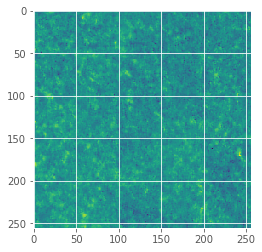

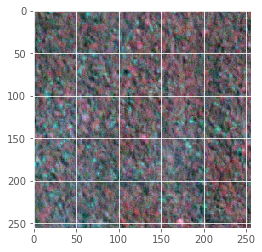

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_1.tif



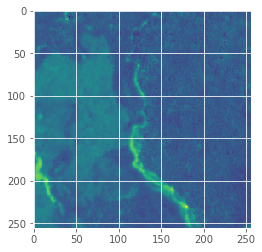

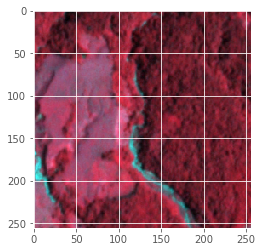

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_2.tif



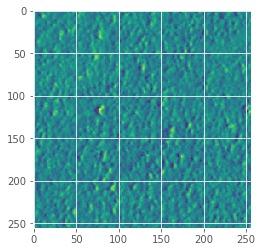

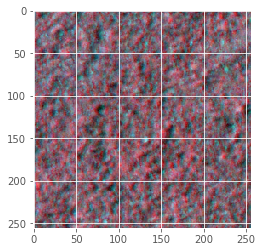

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_3.tif



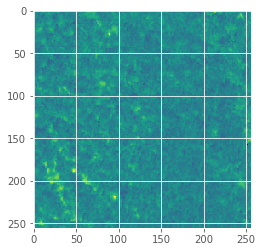

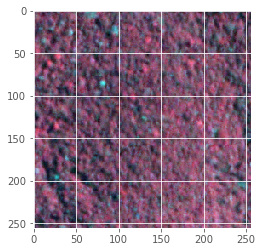

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_4.tif



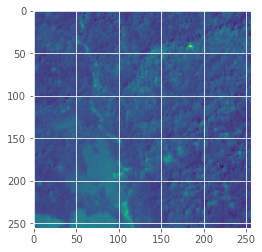

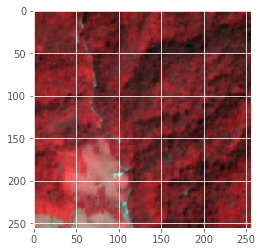

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_5.tif



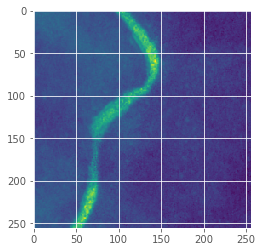

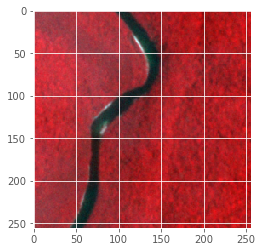

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_6.tif



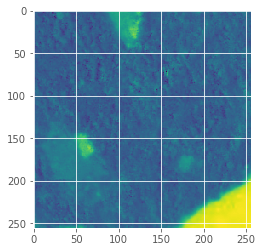

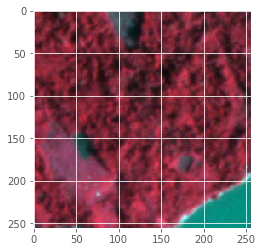

(256L, 256L, 4L)
D:/MLIP-data\train-tif-v2\train_7.tif



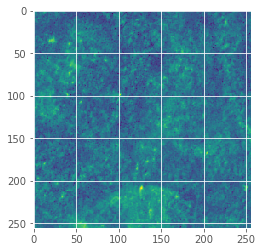

KeyboardInterrupt: 

In [24]:
for i in range(50):
    path = os.path.join(tif_base, 'train_' + str(i) + '.tif')
    img = io.imread(path)
    img3 = get_rgb(img, [3,2,1])
    vi3 = (img3[:, :, 2] - img3[:, :, 0]) / (img3[:, :, 2] + img3[:, :, 0]) # (GREEN - NIR) / (GREEN + NIR)
    plt.imshow(vi3)
    print img.shape
    print path
    print 
    plt.show()
    plt.imshow(img3)
    plt.show()

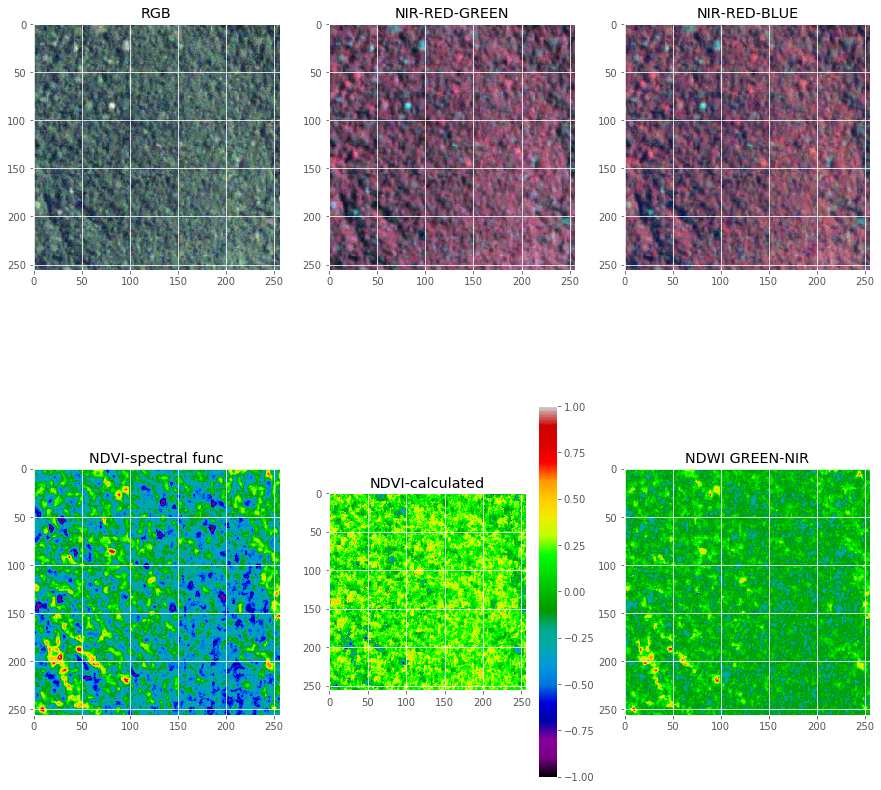

In [33]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
ax = axes.ravel()
ax[0] = plt.subplot(2, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(2, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
ax[2] = plt.subplot(2, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
ax[3] = plt.subplot(2, 3, 4, adjustable='box-forced')
ax[4] = plt.subplot(2, 3, 5, adjustable='box-forced')
ax[5] = plt.subplot(2, 3, 6, adjustable='box-forced')
ax[0].imshow(img2_scaled)  # , cmap=plt.cm.gray)
ax[0].set_title('RGB')
# ax[0].axis('off')
ax[1].imshow(img3_scaled)  # , cmap=plt.cm.gray)
ax[1].set_title('NIR-RED-GREEN')
# ax[1].axis('off')
ax[2].imshow(img4_scaled)  # , cmap=plt.cm.gray)
ax[2].set_title('NIR-RED-BLUE')

# alternative cmaps e.g. nipy_spectral, gist_earth, terrain
ax[3].imshow(vi, cmap=plt.get_cmap('nipy_spectral')) 
ax[3].set_title('NDVI-spectral func')
# ax[2].axis('off')
ax[4].imshow(vi2, cmap=plt.get_cmap('nipy_spectral'))  # , cmap=plt.cm.gray)
ax[4].set_title('NDVI-calculated')
# ax[3].axis('off')
im = ax[5].imshow(vi3, cmap=plt.get_cmap('nipy_spectral'))  # , cmap=plt.cm.gray)
fig.colorbar(im,ax=ax[4])
ax[5].set_title('NDWI GREEN-NIR')
plt.show()